<div style="float:left;"><img src="logo.png" width="500"/></div>

# Characterising Networks

In this demo we will use the Python [NetworkX](https://networkx.org) package to quantitatively characterise an existing network, looking at aspects of the overall network structure, and the centrality or importance of individual nodes. We will use the US air transport network that we created in the last demo

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.precision', 3)

## Network Loading

Load the directed weighted network from the GEXF file created in Demo 1:

In [2]:
g = nx.read_gexf("airstats-weighted-directed.gexf")

## Basic Characterisation

Based on this network, characterise the network’s connectedness (i.e., the density, number of components).

In [3]:
# how many nodes and edges are in the network?
print("Network has %d nodes and %d edges" % (g.number_of_nodes(), g.number_of_edges()))

Network has 1043 nodes and 17644 edges


In [4]:
# what level of density in the network?
print("Density = %.4f" % nx.density(g))

Density = 0.0162


In [5]:
# how many strongly connected components?
nx.number_strongly_connected_components(g)

92

## Measuring Centrality

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, measures the number of connections that a node has. In the case of our airport data, it indicates the number of *routes* than an airport is involved in (i.e. either incoming or outgoing flights).

In [6]:
# We can use networkX to produce a dictionary of centrality values, where the keys are the nodes.
deg = dict(nx.degree(g))
deg

{'05A': 3,
 '1G4': 9,
 '6B0': 4,
 '7AK': 6,
 'A02': 2,
 'A03': 2,
 'A1K': 2,
 'A20': 4,
 'A26': 2,
 'A27': 2,
 'A29': 2,
 'A2K': 2,
 'A37': 1,
 'A39': 1,
 'A3K': 2,
 'A4K': 1,
 'A51': 1,
 'A63': 2,
 'A72': 2,
 'ABE': 56,
 'ABI': 28,
 'ABL': 30,
 'ABQ': 179,
 'ABR': 11,
 'ABY': 14,
 'ACK': 41,
 'ACT': 34,
 'ACV': 11,
 'ACY': 120,
 'ADK': 4,
 'ADQ': 68,
 'ADS': 35,
 'ADW': 3,
 'AET': 18,
 'AEX': 91,
 'AFW': 68,
 'AGC': 9,
 'AGN': 7,
 'AGS': 41,
 'AHN': 18,
 'AIA': 4,
 'AIK': 2,
 'AIN': 24,
 'AKB': 2,
 'AKI': 14,
 'AKK': 8,
 'AKN': 56,
 'AKP': 20,
 'ALB': 156,
 'ALO': 11,
 'ALS': 5,
 'ALW': 2,
 'ALZ': 3,
 'AMA': 75,
 'ANB': 13,
 'ANC': 320,
 'ANI': 79,
 'ANV': 21,
 'AOO': 2,
 'AOS': 2,
 'APA': 11,
 'APC': 4,
 'APF': 16,
 'APN': 7,
 'ARC': 8,
 'ART': 4,
 'ASE': 35,
 'ASN': 2,
 'ATK': 17,
 'ATL': 380,
 'ATT': 17,
 'ATW': 34,
 'ATY': 2,
 'AUG': 4,
 'AUK': 26,
 'AUS': 237,
 'AUW': 1,
 'AVL': 39,
 'AVP': 48,
 'AYS': 1,
 'AZ1': 2,
 'AZA': 139,
 'AZO': 19,
 'BAD': 1,
 'BBD': 2,
 'BDL': 188,
 'BD

We can use these scores to populate a Pandas *Data Frame* and display a ranking of the nodes by their degree scores:

In [7]:
# create Pandas series
sdeg = pd.Series(deg).sort_values(ascending=False)
# create Pandas Data Frame from the series, along with the node city attributes
df = pd.DataFrame({"City":nx.get_node_attributes(g, "city"), "Degree":sdeg})
df = df.sort_values(by="Degree", ascending=False)
# sort in descending order and get top values
df.sort_values(by="Degree", ascending=False).head(10)

,City,Degree
ORD,"Chicago, IL",405
ATL,"Atlanta, GA",380
DEN,"Denver, CO",371
DFW,"Dallas/Fort Worth, TX",351
MSP,"Minneapolis, MN",346
ANC,"Anchorage, AK",320
LAS,"Las Vegas, NV",317
MEM,"Memphis, TN",314
IAH,"Houston, TX",300
LAX,"Los Angeles, CA",298


We could use these scores to identify peripheral airports (i.e. involved in very few routes), where we are interested in few unique connections, either incoming or outgoing:

In [8]:
# note we want the low values
df.sort_values(by="Degree", ascending=True).head(10)

,City,Degree
ZXU,"North Kingstown, RI",1
CEV,"Connersville, IN",1
A39,"Ptarmigan Lake, AK",1
RUI,"Ruidoso, NM",1
CUW,"Cube Cove, AK",1
MIE,"Muncie/Anderson/Newcastle, IN",1
MMI,"Athens, TN",1
WAL,"Chincoteague, VA",1
MMT,"Columbia, SC",1
MRB,"Martinsburg, WV",1


We often want to look at the distribution of degree scores across all nodes in a network to see how they vary. This is usually plotted as a histogram, which shows us the network's **degree distribution**: 

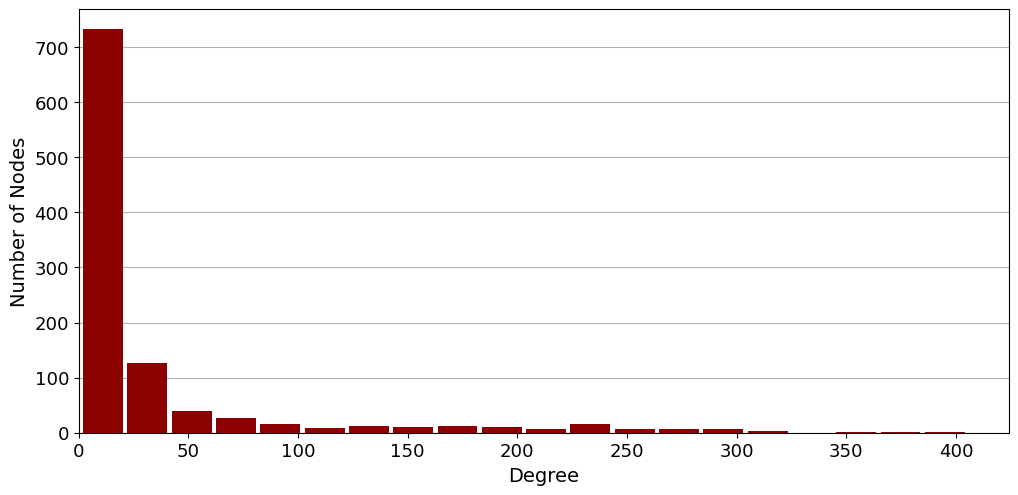

In [9]:
# produce a histogram of the values
ax = df["Degree"].plot(kind="hist", figsize=(12, 5.5), fontsize=13, legend=None, color="darkred", 
    bins=20, zorder=3, rwidth=0.9)
ax.yaxis.grid()
ax.set_xlim(0)
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Degree", fontsize=14);

## In-Degree and Out-Degree Centrality

For directed networks, we usually distinguish between **in-degree** and **out-degree**:

- In-degree: the number of incoming edges that each node has.
- Out-degree: the number of outgoing edges that each node has.

In the case of our flight network, these measures allow us to identify airports which have many incoming routes or outgoing routes.

Firstly, look at out-degrees:

In [10]:
# calculate out-degree scores
out_degrees = dict(g.out_degree())
# add a column to our Data Frame
df["Out-Degree"] = pd.Series(out_degrees)
# sort in descending order and get top values
df.sort_values(by="Out-Degree", ascending=False).head(10)

,City,Degree,Out-Degree
ORD,"Chicago, IL",405,205
ATL,"Atlanta, GA",380,193
DEN,"Denver, CO",371,187
ANC,"Anchorage, AK",320,183
DFW,"Dallas/Fort Worth, TX",351,175
MSP,"Minneapolis, MN",346,171
LAS,"Las Vegas, NV",317,162
MEM,"Memphis, TN",314,162
DTW,"Detroit, MI",292,152
LAX,"Los Angeles, CA",298,151


We can repeat the process for in-degree:

In [11]:
# calculate in-degree scores
in_degrees = dict(g.in_degree())
# add a column to our Data Frame
df["In-Degree"] = pd.Series(in_degrees)
# sort in descending order and get top values
df.sort_values(by="In-Degree", ascending=False).head(10)

,City,Degree,Out-Degree,In-Degree
ORD,"Chicago, IL",405,205,200
ATL,"Atlanta, GA",380,193,187
DEN,"Denver, CO",371,187,184
DFW,"Dallas/Fort Worth, TX",351,175,176
MSP,"Minneapolis, MN",346,171,175
LAS,"Las Vegas, NV",317,162,155
MEM,"Memphis, TN",314,162,152
IAH,"Houston, TX",300,149,151
SDF,"Louisville, KY",288,137,151
LAX,"Los Angeles, CA",298,151,147


It appears that out-degree and in-degree scores for the nodes are generally very similar for this network. 

We could check this at a network level by creating a scatter plot of in-degree versus out-degree for all nodes.

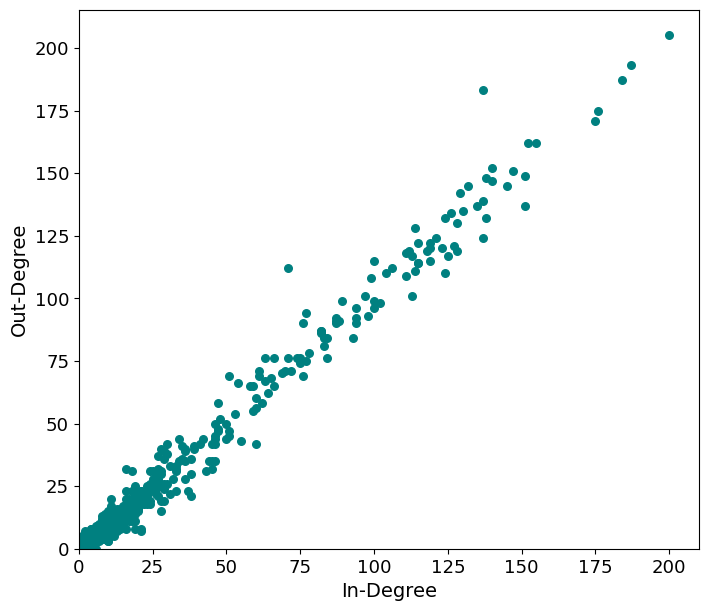

In [12]:
# produce the scatter plot
ax = df.plot(kind="scatter", x="In-Degree", y="Out-Degree", figsize=(8, 7), 
    fontsize=13, color="teal", s=30)
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel("In-Degree", fontsize=14)
ax.set_ylabel("Out-Degree", fontsize=14);

## Weighted Centrality Measures

When we have *weights* on our edges, we can take these into account when measuring centrality. In a weighted network, the **weighted degree** is the sum of the weights on the edges connected to each node.

There are analogous weighted equivalents of in-degree and out-degree. We can use these to identify frequent origin and destination airports in the network (i.e., high weighted in-degree / out-degree).

Firstly we will look at **weighted out-degree** (i.e. the sum of the weights on outgoing edges):

In [13]:
# calculate weighted out-degree
wout_degrees = dict(g.out_degree(weight="weight"))
# add a column to our Data Frame
df["W-Out-Degree"] = pd.Series(wout_degrees)
# sort in descending order and get top values
df.sort_values(by="W-Out-Degree", ascending=False).head(10)

,City,Degree,Out-Degree,In-Degree,W-Out-Degree
ORD,"Chicago, IL",405,205,200,3556.0
DEN,"Denver, CO",371,187,184,2866.0
DTW,"Detroit, MI",292,152,140,2512.0
ATL,"Atlanta, GA",380,193,187,2468.0
MSP,"Minneapolis, MN",346,171,175,2363.0
IAH,"Houston, TX",300,149,151,2304.0
DFW,"Dallas/Fort Worth, TX",351,175,176,1997.0
LAX,"Los Angeles, CA",298,151,147,1964.0
PHL,"Philadelphia, PA",286,148,138,1849.0
EWR,"Newark, NJ",271,142,129,1827.0


Next we looked at **weighted in-degree**  (i.e. the sum of the weights on incoming edges):

In [14]:
# calculate weighted in-degree
win_degrees = dict(g.in_degree(weight="weight"))
# add a column to our Data Frame
df["W-In-Degree"] = pd.Series(win_degrees)
# sort in descending order and get top values
df.sort_values(by="W-In-Degree", ascending=False).head(10)

,City,Degree,Out-Degree,In-Degree,W-Out-Degree,W-In-Degree
ORD,"Chicago, IL",405,205,200,3556.0,3515.0
DEN,"Denver, CO",371,187,184,2866.0,2811.0
DTW,"Detroit, MI",292,152,140,2512.0,2463.0
ATL,"Atlanta, GA",380,193,187,2468.0,2423.0
MSP,"Minneapolis, MN",346,171,175,2363.0,2359.0
IAH,"Houston, TX",300,149,151,2304.0,2324.0
DFW,"Dallas/Fort Worth, TX",351,175,176,1997.0,2023.0
LAX,"Los Angeles, CA",298,151,147,1964.0,1970.0
PHL,"Philadelphia, PA",286,148,138,1849.0,1879.0
EWR,"Newark, NJ",271,142,129,1827.0,1827.0


Again we could look at the relationship between these two weighted centrality scores in the network:

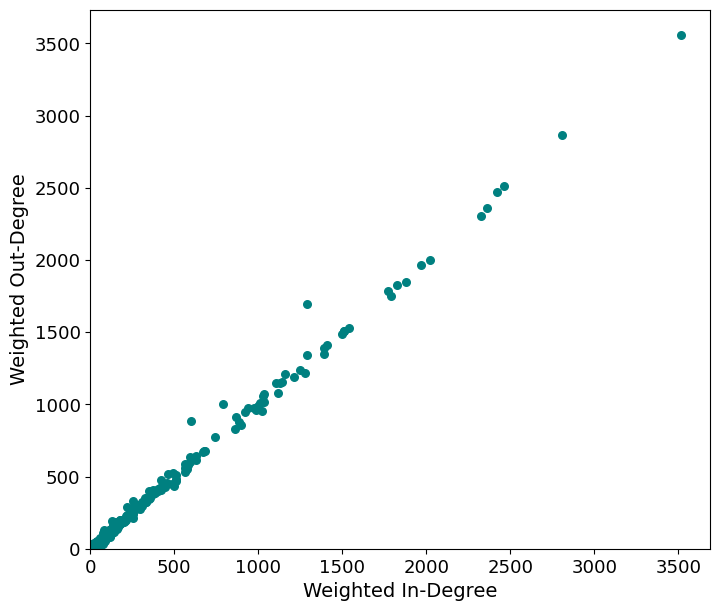

In [15]:
# produce a scatter plot
ax = df.plot(kind="scatter", x="W-In-Degree", y="W-Out-Degree", figsize=(8, 7), 
    fontsize=13, color="teal", s=30)
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel("Weighted In-Degree", fontsize=14)
ax.set_ylabel("Weighted Out-Degree", fontsize=14);

We could also look at the overall distributions for the in-degree and out-degree scores:

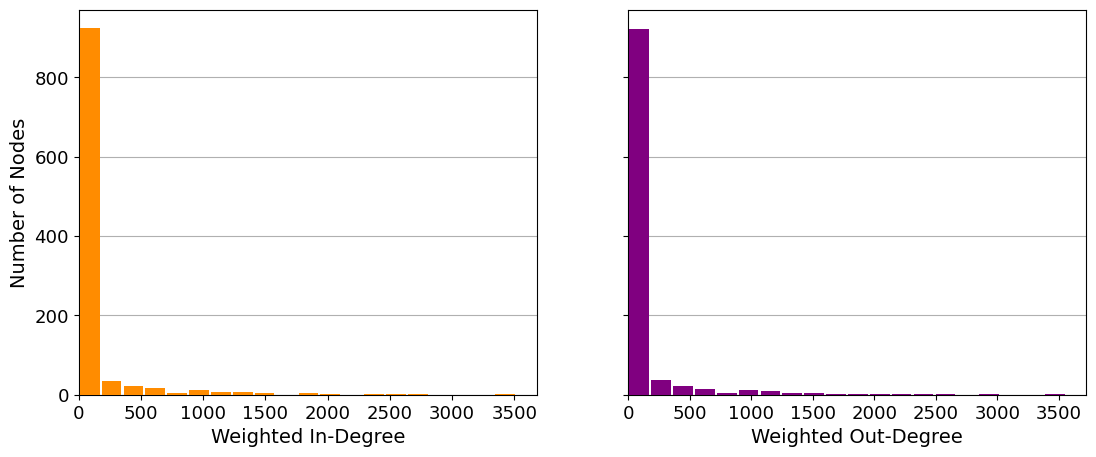

In [16]:
plt.subplots(1, 2, sharey=True, figsize=(13,5))
# create the first subplot
plt.subplot(1,2,1)
ax1 = df["W-In-Degree"].plot(kind="hist", fontsize=13, legend=None, color="darkorange", 
    bins=20, zorder=3, rwidth=0.9)
ax1.yaxis.grid()
ax1.set_xlim(0)
ax1.set_ylabel("Number of Nodes", fontsize=14)
ax1.set_xlabel("Weighted In-Degree", fontsize=14);
# create the second subplot
plt.subplot(1,2,2)
ax2 = df["W-Out-Degree"].plot(kind="hist", fontsize=13, legend=None, color="purple", 
    bins=20, zorder=3, rwidth=0.9, ax=plt.gca());
ax2.yaxis.grid()
ax2.set_xlim(0)
ax2.set_ylabel("Number of Nodes", fontsize=14)
ax2.set_xlabel("Weighted Out-Degree", fontsize=14);

## Other Centrality Measures

Going beyond counting edges and weights, we can use **betweenness centrality** to identify bridging nodes in a network. Nodes that occur on many shortest paths between other nodes in the network have high betweenness centrality.

In our flight network, we could use this measure to identify key hub airports in the network with high betweenness

In [17]:
# calcuate betweennness centrality scores
between_scores = nx.betweenness_centrality(g)
# add a column to our Data Frame
df["Between"] = pd.Series(between_scores)
# sort in descending order and get top values
df.sort_values(by="Between", ascending=False).head(10)

,City,Degree,Out-Degree,In-Degree,W-Out-Degree,W-In-Degree,Between
ANC,"Anchorage, AK",320,183,137,1694.0,1292.0,0.282
FAI,"Fairbanks, AK",183,112,71,888.0,602.0,0.078
SEA,"Seattle, WA",265,135,130,1509.0,1512.0,0.068
HPN,"White Plains, NY",229,118,111,322.0,307.0,0.065
ORD,"Chicago, IL",405,205,200,3556.0,3515.0,0.058
DEN,"Denver, CO",371,187,184,2866.0,2811.0,0.053
MSP,"Minneapolis, MN",346,171,175,2363.0,2359.0,0.046
ADQ,"Kodiak, AK",68,40,28,197.0,176.0,0.036
DFW,"Dallas/Fort Worth, TX",351,175,176,1997.0,2023.0,0.034
ATL,"Atlanta, GA",380,193,187,2468.0,2423.0,0.033


The **eigenvector centrality** of a node proportional to the sum of the centrality scores of its neighbours. This means that a node is important if it connected to other important nodes.

In [18]:
# calcuate eigenvector centrality scores
eig_scores = nx.eigenvector_centrality(g)
# add a column to our Data Frame
df["Eigenvector"] = pd.Series(eig_scores)
# sort in descending order and get top values
df.sort_values(by="Eigenvector", ascending=False).head(10)

,City,Degree,Out-Degree,In-Degree,W-Out-Degree,W-In-Degree,Between,Eigenvector
ATL,"Atlanta, GA",380,193,187,2468.0,2423.0,0.033,0.133
ORD,"Chicago, IL",405,205,200,3556.0,3515.0,0.058,0.129
MSP,"Minneapolis, MN",346,171,175,2363.0,2359.0,0.046,0.126
MEM,"Memphis, TN",314,162,152,1346.0,1391.0,0.021,0.125
DEN,"Denver, CO",371,187,184,2866.0,2811.0,0.053,0.123
DFW,"Dallas/Fort Worth, TX",351,175,176,1997.0,2023.0,0.034,0.123
LAS,"Las Vegas, NV",317,162,155,1527.0,1538.0,0.025,0.122
IAH,"Houston, TX",300,149,151,2304.0,2324.0,0.021,0.120
SDF,"Louisville, KY",288,137,151,1080.0,1118.0,0.018,0.120
DTW,"Detroit, MI",292,152,140,2512.0,2463.0,0.015,0.118


Different measures will be appropriate in different contexts:

- Degree centrality: when the number of connections is important
- Betweenness centrality: when control over transmission is important
- Closeness centrality: when time taken to reach nodes is important
- Eigenvector centrality: when influence of neighbours is important

In [19]:
# look at the correlation between the different centrality measures
df.corr()

/tmp/ipykernel_11754/1457644469.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Degree,Out-Degree,In-Degree,W-Out-Degree,W-In-Degree,Between,Eigenvector
Degree,1.000,0.998,0.998,0.909,0.909,0.492,0.961
Out-Degree,0.998,1.000,0.993,0.910,0.908,0.511,0.954
In-Degree,0.998,0.993,1.000,0.905,0.907,0.470,0.966
W-Out-Degree,0.909,0.910,0.905,1.000,0.998,0.523,0.841
W-In-Degree,0.909,0.908,0.907,0.998,1.000,0.489,0.848
Between,0.492,0.511,0.470,0.523,0.489,1.000,0.335
Eigenvector,0.961,0.954,0.966,0.841,0.848,0.335,1.000
